### 画像をn枚のパッチに分割しノード特徴を対応する画像パッチとする。画像はカラー画像とする。エッジは最近傍ノードにエッジを張る
一応エッジにはパッチ間のコサイン類似度を代入する。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import time
import random
import cv2
from tqdm import tqdm
import dgl
import networkx as nx

In [2]:
from torchvision.datasets import STL10
from torchvision import transforms

target_size=(224,224)
transform=transforms.Compose([
    transforms.Resize(target_size),
    transforms.ToTensor()
])

STL10_train = STL10("STL10", split='train', download=True, transform=transform)
 
STL10_test = STL10("STL10", split='test', download=True, transform=transform)


 52%|█████▏    | 1368260608/2640397119 [13:25<12:28, 1699470.29it/s]


KeyboardInterrupt: 

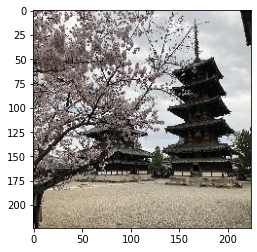

In [10]:
image=cv2.imread('images/IMG_0907.jpeg')
image=cv2.resize(image,(224,224))
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


C:\Users\kisim\AppData\Local\Temp/ipykernel_2968/3872301675.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image=torch.tensor(image)


224
56


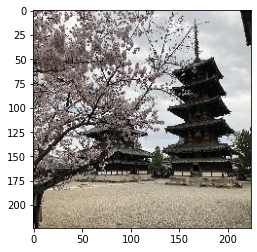

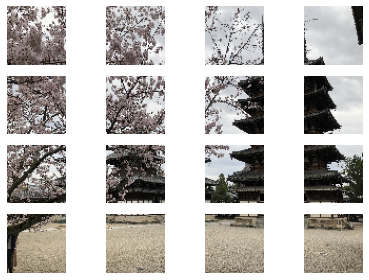

In [21]:
#画像一枚読み込み
#image,label=STL10_train[0]
#HWCに入れ替え
image=torch.tensor(image)
#image=image.permute(1,2,0)
#表示
plt.imshow(image)
#パッチに分割
#画像をn分割。テストで3枚に分割。
num_patch=4
size=image.shape[0]
print(size)
patch_width=int(size/num_patch)
print(patch_width)
data=[]

for i in range(0,size,patch_width):
    #print(i)
    for j in range(0,size,patch_width):
        #print(j)
        data.append(image[i: i + patch_width,j: j + patch_width, :])

#分割した各パッチを正方形に表示
# 1枚の図を作成
fig = plt.figure()

# 画像を追加
for i in range(num_patch**2):
    ax = fig.add_subplot(num_patch, num_patch, i+1)
    ax.imshow(data[i])
    ax.axis('off')

# 画像を表示
plt.tight_layout()
plt.show()